# Breast Cancer Wisconsin Classification 

## Introduction 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 

## Objectives 

- Explore the dataset. 
- Clean the dataset (find and handling anomalies and missing data). 
- Feature selection. 
- Building classification model. 

## Import Modules and Data 

- Importing necessary libraries. 
- Importing dataset. 
- Looking at data. 

In [29]:
import pandas as pd 
import math 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, HalvingGridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neural_network import MLPClassifier 
from xgboost import XGBClassifier 
from sklearn.metrics import roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(569, 33)

In [4]:
with pd.option_context('display.max_row', 5, 'display.max_columns', None):
    display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Cleaning Data 

- Find and manage missing data. 
- Find and manage duplicate observations. 
- Find and manage irrelevant data. 

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- All variables are continuous. 
- One column is empty. 
- No null values. 

In [7]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [8]:
assert 'Unnamed: 32' not in df.columns

In [9]:
assert 'id' not in df.columns

In [10]:
df.duplicated().any()

False

No duplicated observations. 

## EDA

In [11]:
with pd.option_context('display.max_row', None, 'display.max_columns', None):
    display(df.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


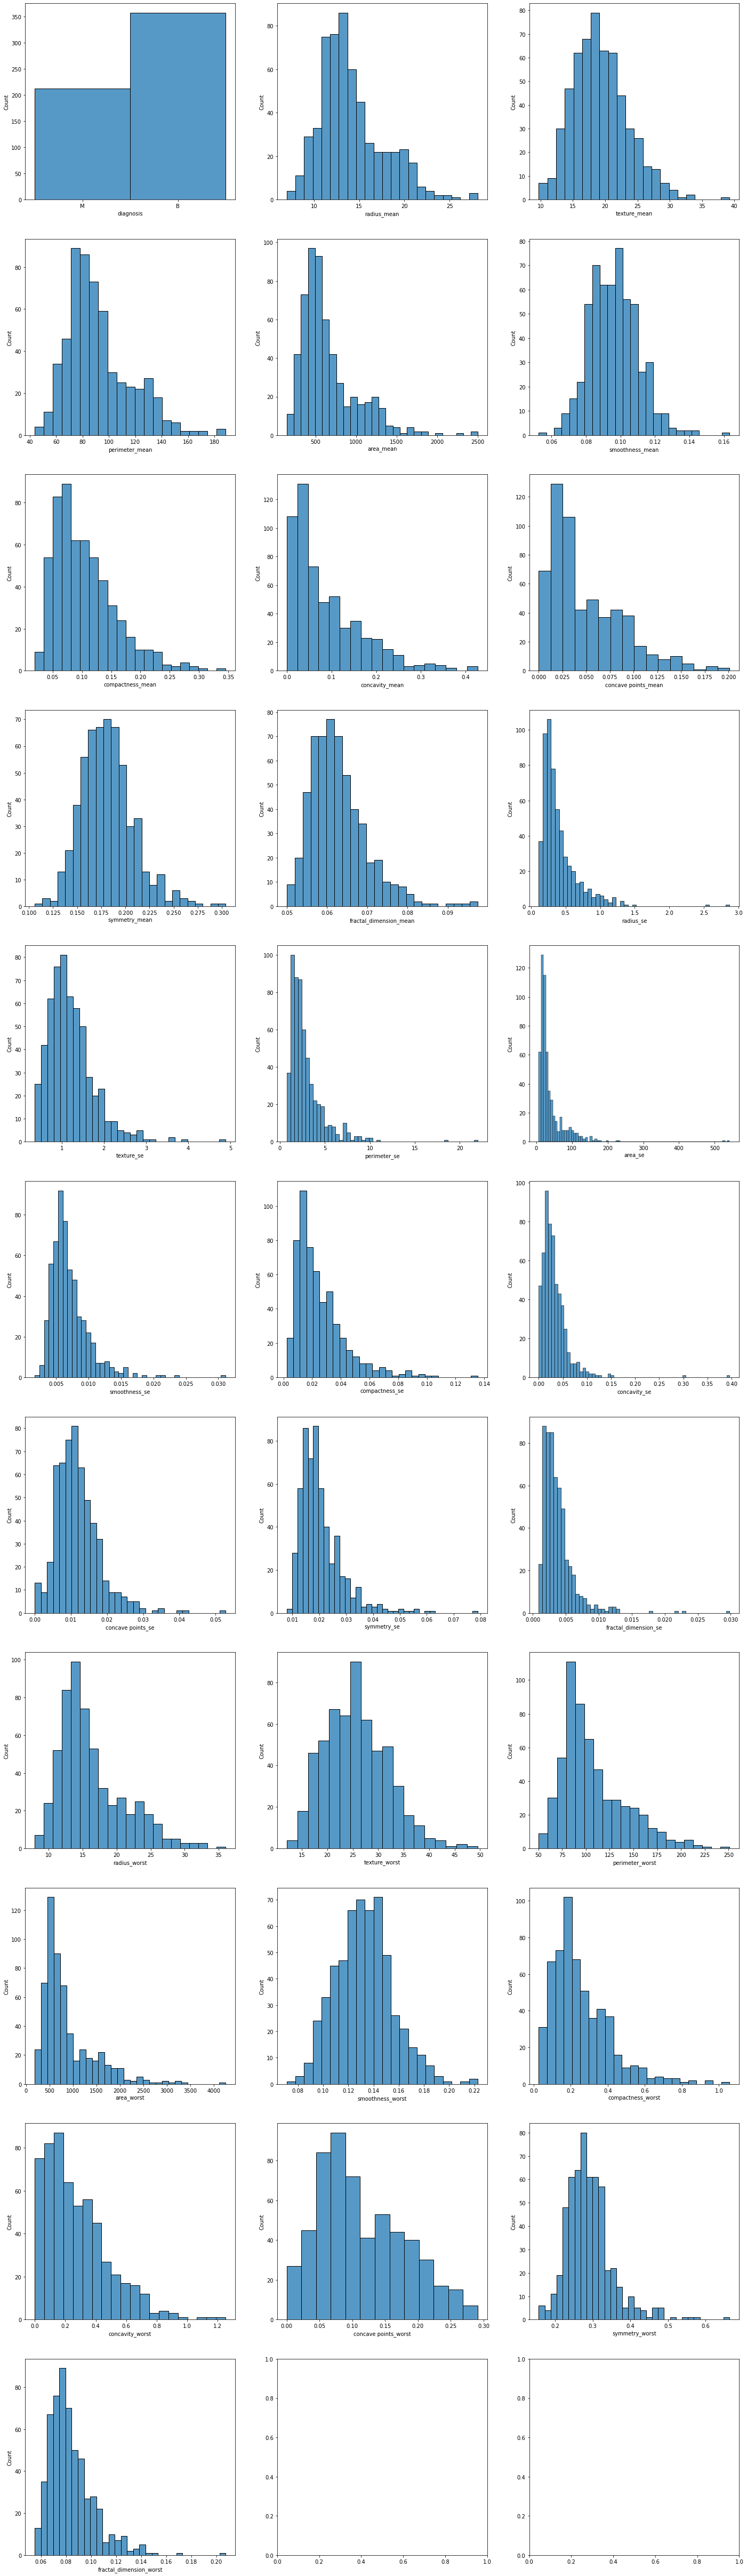

In [12]:
columns_number = len(df.columns)
row_number = math.ceil(columns_number/3)
fig, ax = plt.subplots(row_number, 3, figsize=(24, 8*row_number))
count = 0
sns.reset_defaults()
for i in range(row_number): 
    for j in range(3):
        if count < len(df.columns):
            sns.histplot(ax=ax[i, j], data=df[df.columns[count]])
            count += 1

There are 1-2 outliers found in most features as seen above. Yet, there is no definite reason (requires domain knowledge) as why to remove them. 

Calculating correlation between features to find and drop multicollinearity if any. 

<AxesSubplot:>

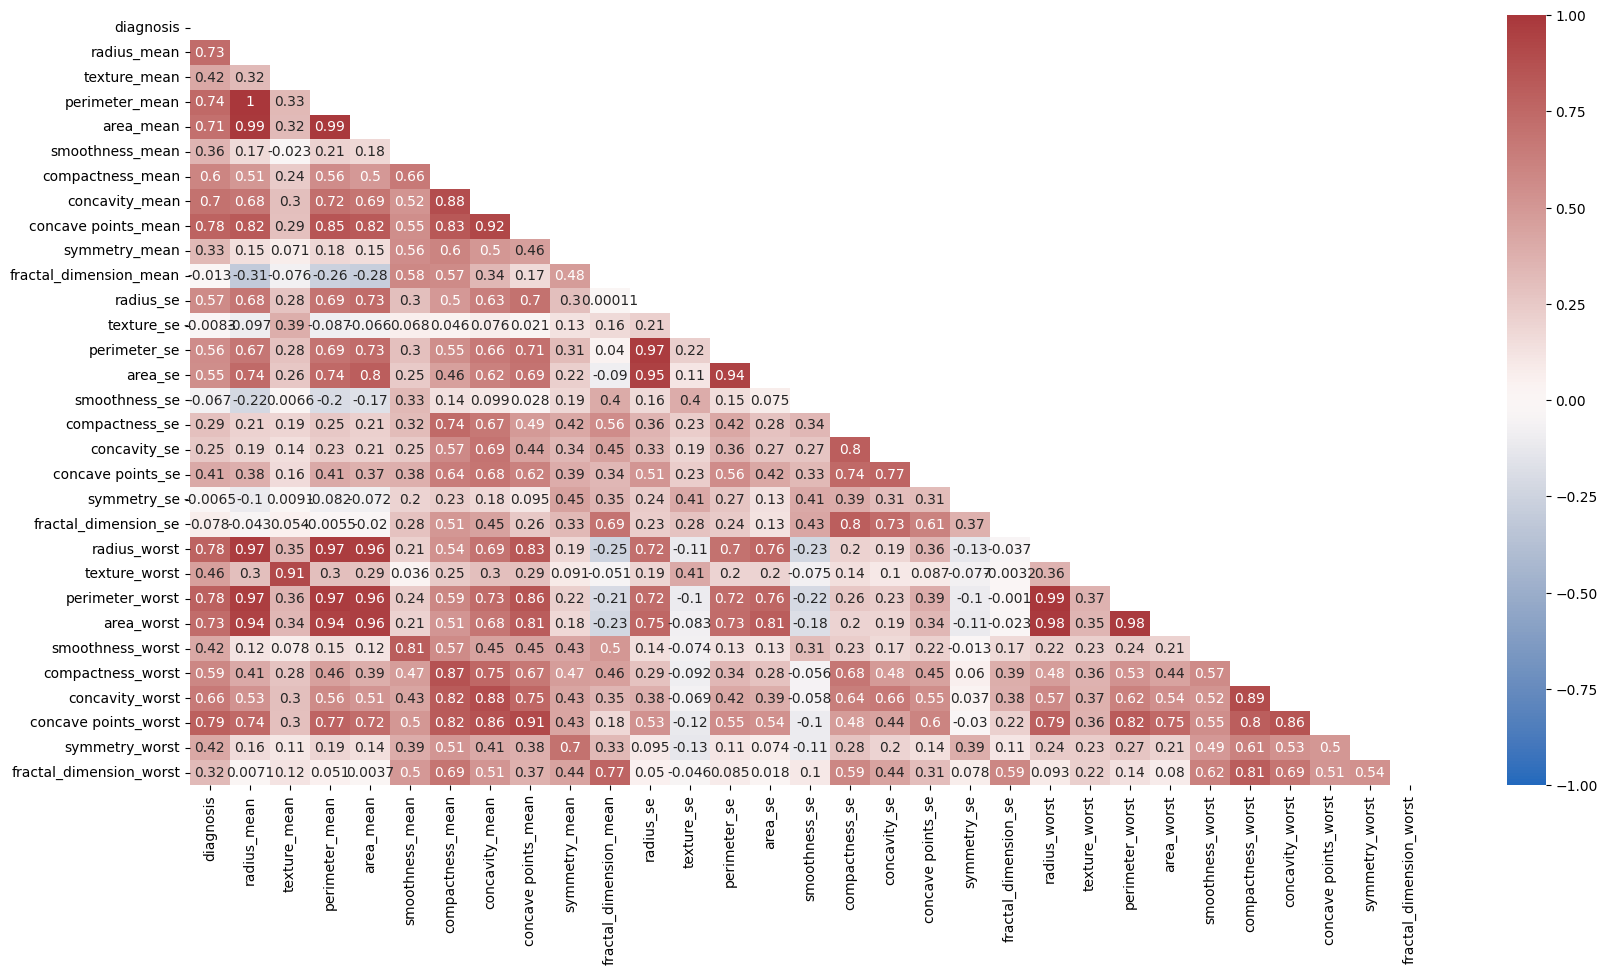

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20,10)) 
df.replace({'diagnosis': {'M': 1, 'B':0}}, inplace=True)
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(ax=ax, data=corr, mask=mask, cmap='vlag', vmin=-1, vmax=1, annot=True)

Found some high multicollinearity features including: 'radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'texture_mean', 'concave points_mean', 'concavity_mean', 'perimeter_se', 'area_se', 'radius_se'

In [14]:
pred_feat = df.drop('diagnosis', axis=1)

vif_data = pd.DataFrame() 
vif_data['feature'] = pred_feat.columns 

vif_data['VIF'] = [variance_inflation_factor(pred_feat.values, i) for i in range(len(pred_feat.columns))] 
vif_data.sort_values(by='VIF', ascending=False, inplace=True) 
vif_data.reset_index(drop=True, inplace=True) 
vif_data

,feature,VIF
0,radius_mean,63306.172036
1,perimeter_mean,58123.586079
2,radius_worst,9674.742602
3,perimeter_worst,4487.781270
4,area_mean,1287.262339
5,area_worst,1138.759252
6,fractal_dimension_mean,629.679874
7,fractal_dimension_worst,423.396723
8,smoothness_mean,393.398166
9,smoothness_worst,375.597155


In [15]:
high_VIF_feat = vif_data['feature'][:15] 
dropped = pred_feat.drop(high_VIF_feat, axis=1) 
dropped.columns


Index(['compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [16]:
vif_data_1 = pd.DataFrame() 
vif_data_1['feature'] = dropped.columns 

vif_data_1['VIF'] = [variance_inflation_factor(dropped.values, i) for i in range(len(dropped.columns))] 
vif_data_1.sort_values(by='VIF', ascending=False, inplace=True) 
vif_data_1.reset_index(drop=True, inplace=True) 
vif_data_1

,feature,VIF
0,concavity_mean,122.109496
1,concave points_mean,104.681557
2,concave points_worst,98.265082
3,compactness_worst,82.282183
4,compactness_mean,80.989823
5,concavity_worst,77.115325
6,symmetry_mean,36.650862
7,concave points_se,34.245945
8,compactness_se,32.804638
9,concavity_se,27.878726


In [17]:
high_VIF_1 = vif_data_1['feature'][:6]
dropped_1 = dropped.drop(high_VIF_1, axis=1)

vif_data_2 = pd.DataFrame() 
vif_data_2['feature'] = dropped_1.columns 

vif_data_2['VIF'] = [variance_inflation_factor(dropped_1.values, i) for i in range(len(dropped_1.columns))] 
vif_data_2.sort_values(by='VIF', ascending=False, inplace=True) 
vif_data_2.reset_index(drop=True, inplace=True) 
vif_data_2


,feature,VIF
0,concave points_se,15.028100
1,symmetry_mean,14.140142
2,compactness_se,13.764380
3,symmetry_se,11.522424
4,fractal_dimension_se,10.511609
5,smoothness_se,9.355463
6,concavity_se,7.972106
7,texture_se,7.486681
8,area_se,2.272811


## Model 

- Models used: 
    - CART 
    - Random forest 
    - XGBoost 
    - MLP
- Data used: 
    - Full features 
    - Drop high VIF 

Models used are tree-based algorithms and neural networks as there are a few outliers. 
Comparing models on full features dataset and dropped features dataset. 

In [18]:
full_feat = df.copy() 
dropped_feat = df[['concave points_se', 'symmetry_mean', 'compactness_se', 'symmetry_se', 
                     'fractal_dimension_se', 'smoothness_se', 'concavity_se', 'texture_se', 
                     'area_se', 'diagnosis']] 

full_X = full_feat.drop('diagnosis', axis=1) 
full_y = full_feat['diagnosis'] 

dropped_X = dropped_feat.drop('diagnosis', axis=1) 
dropped_y = dropped_feat['diagnosis'] 

In [19]:
full_X_train, full_X_test, full_y_train, full_y_test = train_test_split(full_X, full_y, test_size=0.2, 
                                                                        random_state=17) 
dropped_X_train, dropped_X_test, dropped_y_train, dropped_y_test = train_test_split(dropped_X, dropped_y, 
                                                                                    test_size=0.2, random_state=17) 


In [20]:
pipelines = {} 
pipe_dt = Pipeline([('scl', StandardScaler()), ('dt', DecisionTreeClassifier())]) 
pipe_rf = Pipeline([('scl', StandardScaler()), ('rf', RandomForestClassifier())]) 
pipe_gb = Pipeline([('scl', StandardScaler()), ('Ggb', GradientBoostingClassifier())]) 
pipe_mlp = Pipeline([('scl', StandardScaler()), ('mlp', MLPClassifier(max_iter=400))]) 
pipe_xgb = Pipeline([('scl', StandardScaler()), ('xgb', XGBClassifier(tree_method='gpu_hist'))]) 
pipelines['dt'] = pipe_dt 
pipelines['rf'] = pipe_rf 
pipelines['gb'] = pipe_gb 
pipelines['mlp'] = pipe_mlp 
pipelines['xgb'] = pipe_xgb 

In [21]:
hyper_params = {} 
param_dt = {
    'dt__criterion': ['gini', 'entropy'], 
    'dt__max_depth': [2, 3, 5, 10, 15 ,20], 
    'dt__min_samples_split': [2, 3, 4, 5], 
    'dt__min_samples_leaf': [5, 10, 20, 50, 100]
} 

param_rf = { 
    'rf__criterion': ['gini', 'entropy'], 
    'rf__max_depth': [5, 10, 20], 
    'rf__min_samples_split': [2, 3, 4, 5], 
    'rf__min_samples_leaf': [5, 10, 20], 
    'rf__max_features': ['sqrt', 'log2'], 
    'rf__n_estimators': [10, 100, 500]
} 

param_gb = { 
    'Ggb__n_estimators': [10, 100], 
    'Ggb__learning_rate': [0.001, 0.01, 0.1], 
    'Ggb__subsample': [0.5, 0.7, 1.0], 
    'Ggb__max_depth': [2, 3, 5, 10 ,20]
} 

param_mlp = { 
    'mlp__solver': ['sgd', 'adam'], 
    'mlp__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant','adaptive']
} 

param_xgb = { 
    'xgb__max_depth': [3, 10, 30],
    'xgb__learning_rate': [0.01, 0.1, 1],
    # 'xgb__subsample': [0.1, 0.5, 0.9],
    # 'xgb__colsample_bytree': [0.1, 0.5, 0.9],
    # 'xgb__colsample_bylevel': [0.1, 0.5, 0.9],
    'xgb__n_estimators': [10, 100, 500]
}

hyper_params['dt'] = param_dt 
hyper_params['rf'] = param_rf 
hyper_params['gb'] = param_gb 
hyper_params['mlp'] = param_mlp 
hyper_params['xgb'] = param_xgb 

In [22]:
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [40]:
nested_scores = {} 
full_feat_scores = {} 
dropped_feat_scores = {} 
for model in pipelines.keys(): 
    clf = GridSearchCV(estimator=pipelines[model], param_grid=hyper_params[model], 
                       scoring='roc_auc', cv=inner_cv, n_jobs=4, verbose=1) 
    full_nested_score = cross_val_score(clf, X=full_X_train, y=full_y_train, cv=outer_cv) 
    dropped_nested_score = cross_val_score(clf, X=dropped_X_train, y=dropped_y_train, cv=outer_cv) 
    full_feat_scores[model] = full_nested_score 
    dropped_feat_scores[model] = dropped_nested_score 

nested_scores['full'] = full_feat_scores 
nested_scores['dropped'] = dropped_feat_scores 


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidat

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-p

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-p

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-p

In [141]:
full_scores = pd.DataFrame(full_feat_scores) 
full_scores 

,dt,rf,gb,mlp,xgb
0,0.953044,0.985552,0.988648,0.996904,0.991228
1,0.977296,0.993367,0.996939,0.992857,0.990816
2,0.978571,0.998980,0.997449,0.999490,0.996429
3,0.985714,0.994898,0.995918,1.000000,0.996429
4,0.924745,0.992857,0.989286,0.992857,0.985714


In [142]:
full_scores = pd.melt(full_scores) 
full_scores.rename(columns={'variable':'model', 'value':'value'}, inplace=True) 
full_scores['features'] = 'full' 
full_scores

,model,value,features
0,dt,0.953044,full
1,dt,0.977296,full
2,dt,0.978571,full
3,dt,0.985714,full
4,dt,0.924745,full
5,rf,0.985552,full
6,rf,0.993367,full
7,rf,0.998980,full
8,rf,0.994898,full
9,rf,0.992857,full


In [143]:
dropped_scores = pd.DataFrame(dropped_feat_scores) 
dropped_scores 

,dt,rf,gb,mlp,xgb
0,0.861197,0.910733,0.928793,0.942208,0.912797
1,0.918622,0.957653,0.964286,0.976020,0.975000
2,0.892347,0.955612,0.946429,0.973980,0.965816
3,0.894133,0.983163,0.974490,0.973469,0.978061
4,0.865306,0.936735,0.928571,0.971939,0.952551


In [144]:
dropped_scores = pd.melt(dropped_scores) 
dropped_scores.rename(columns={'variable':'model', 'value':'value'}, inplace=True) 
dropped_scores['features'] = 'dropped'
dropped_scores

,model,value,features
0,dt,0.861197,dropped
1,dt,0.918622,dropped
2,dt,0.892347,dropped
3,dt,0.894133,dropped
4,dt,0.865306,dropped
5,rf,0.910733,dropped
6,rf,0.957653,dropped
7,rf,0.955612,dropped
8,rf,0.983163,dropped
9,rf,0.936735,dropped


In [145]:
scores = pd.concat([full_scores, dropped_scores], join='inner') 
scores

,model,value,features
0,dt,0.953044,full
1,dt,0.977296,full
2,dt,0.978571,full
3,dt,0.985714,full
4,dt,0.924745,full
5,rf,0.985552,full
6,rf,0.993367,full
7,rf,0.998980,full
8,rf,0.994898,full
9,rf,0.992857,full


<AxesSubplot:xlabel='model', ylabel='value'>

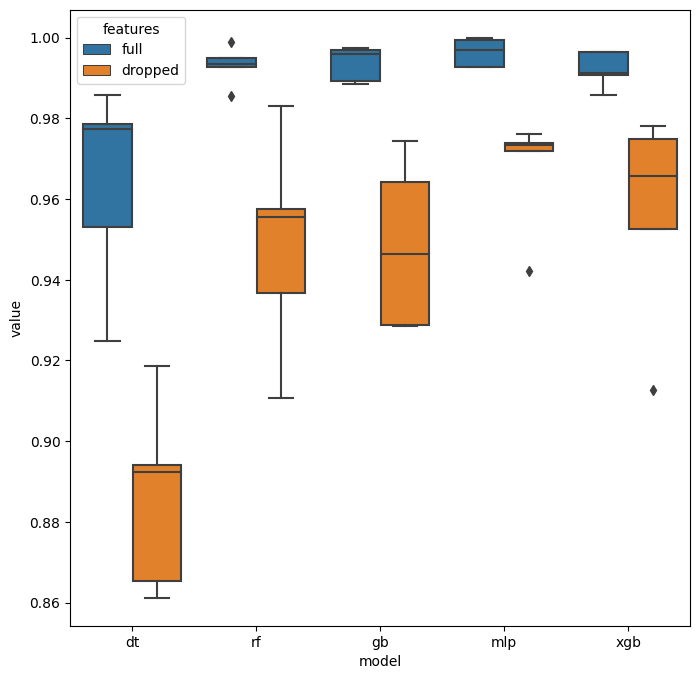

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(ax=ax, data=scores, x='model', y='value', hue='features') 

The models perform better without dropping features and multi layer perceptron performs especially well. 

In [24]:
mlp_model = Pipeline([('scl', StandardScaler()), ('mlp', MLPClassifier(max_iter=500))]) 
model = GridSearchCV(estimator=mlp_model, param_grid=param_mlp, 
                    scoring='roc_auc', cv=inner_cv, n_jobs=4, verbose=1) 
model.fit(full_X_train, full_y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('mlp', MLPClassifier(max_iter=500))]),
             n_jobs=4,
             param_grid={'mlp__activation': ['tanh', 'relu'],
                         'mlp__alpha': [0.0001, 0.05],
                         'mlp__hidden_layer_sizes': [(50, 50, 50),
                                                     (50, 100, 50), (100,)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__solver': ['sgd', 'adam']},
             scoring='roc_auc', verbose=1)

## Testing 

In [28]:
train_scores = cross_val_score(estimator=model, X=full_X_train, y=full_y_train, cv=inner_cv) 
test_scores = cross_val_score(estimator=model, X=full_X_test, y=full_y_test, cv=inner_cv) 
print(f"Train scores ROC AUC: ({np.mean(train_scores)}, {np.std(train_scores)})") 
print(f"Test scores ROC AUC: ({np.mean(test_scores)}, {np.std(test_scores)})") 

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Ttrain scores ROC AUC: (0.9975510204081631, 0.002999375195244744)
Test scores ROC AUC: (0.9717857142857144, 0.03706111273420572)


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The model perform really well both on train and test dataset. 

In [30]:
test_cm = confusion_matrix(full_y_test, model.predict(full_X_test)) 
test_cm

array([[75,  1],
       [ 4, 34]], dtype=int64)